# Convergence of fixed point iteration

We revisit {doc}`fp-spiral` and investigate the observed convergence more closely. Recall that above we calculated $g'(r)\approx-0.42$ at the convergent fixed point.

In [1]:
using FundamentalsNumericalComputation

In [6]:
p = Polynomial([3.5,-4,1])
r = roots(p)
@show rmin,rmax = sort(r);

(rmin, rmax) = sort(r) = [1.2928932188134525, 2.7071067811865475]


Here is the fixed point iteration. This time we keep track of the whole sequence of approximations.

In [3]:
g = x -> x - p(x);
x = 2.1; 
for k = 1:12
    x = [x;g(x[k])]
end
x

13-element Array{Float64,1}:
 2.1
 2.59
 2.7419000000000002
 2.69148439
 2.713333728386328
 2.7044887203327885
 2.7081843632566587
 2.7066592708954196
 2.7072919457529734
 2.7070300492259465
 2.707138558717502
 2.707093617492436
 2.7071122335938966

It's easiest to construct and plot the sequence of errors.

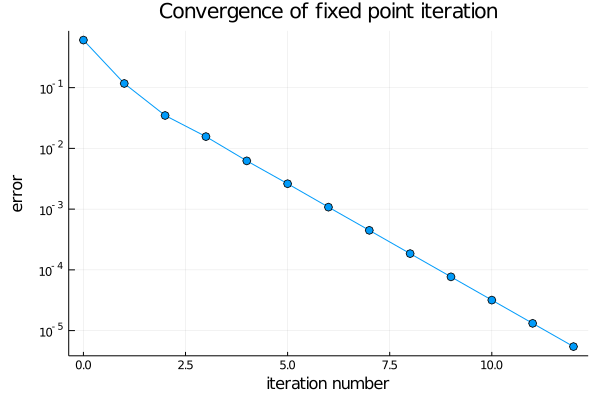

In [7]:
err = @. abs(x - rmax)
plot(0:12,err,m=:o,
    leg=:none,xaxis=("iteration number"),yaxis=("error",:log10),title="Convergence of fixed point iteration")

It's quite clear that the convergence quickly settles into a linear rate. We could estimate this rate by doing a least-squares fit to a straight line. Keep in mind that the values for small $k$ should be left out of the computation, as they don't represent the linear trend.

In [8]:
y = log.(err[5:12])
p = fit(5.0:12.0,y,1)

Polynomial(-0.6680573888302028 - 0.8807181589734455*x)

We can exponentiate the slope to get the convergence constant $\sigma$.

In [9]:
sigma = exp(p.coeffs[2])

0.41448513854854724

The numerical values of the error should decrease by a factor of $\sigma$ at each iteration. We can check this easily with an elementwise division.

In [10]:
@. err[9:12] / err[8:11]

4-element Array{Float64,1}:
 0.4137660520817109
 0.4143987269383
 0.4141368304124451
 0.4142453399049934

The methods for finding $\sigma$ agree well.